In [12]:
# Setup

from __future__ import print_function
import numpy as np
import matplotlib.pyplot as plt
from time import time
from skimage import io
from skimage.transform import resize


(112, 112)


(-0.5, 111.5, 111.5, -0.5)

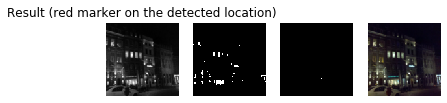

In [73]:
from filters import normalized_cross_correlation

# Load image
img_path = './data/AachenNight/2012-01-14_18-32-07_753.jpg'
temp_path = 'template.png'
img = io.imread(img_path)
img_grey = cv2.imread(img_path, 0)
img = resize(img,(112,112),anti_aliasing=True,preserve_range=True).astype(np.uint8)
img_grey = resize(img_grey,(112,112),anti_aliasing=True,preserve_range=True).astype(np.uint8)
#blurred = cv2.GaussianBlur(img_grey, (5, 5), 0)
blurred = img_grey
#blurred = np.uint8((blurred - blurred.min())/(blurred.max()-blurred.min())*255)
thresh = cv2.threshold(blurred, 150, 255, cv2.THRESH_BINARY)[1]
print(thresh.shape)

temp = io.imread(temp_path)
temp_grey = cv2.imread(temp_path,0)
temp_grey = resize(temp_grey,(15,15),anti_aliasing=True,preserve_range=True).astype(np.uint8)

# Perform cross-correlation between the image and the template
out = cv2.matchTemplate(img_grey, temp_grey,cv2.TM_CCOEFF_NORMED)

# Find the location with maximum similarity
y,x = (np.unravel_index(out.argmax(), out.shape))

# Display image
plt.figure()
plt.subplot(1, 4, 1)
plt.imshow(img_grey,cmap='gray')
plt.title('Result (red marker on the detected location)')
plt.axis('off')

# Draw marker at detcted location
#plt.plot(x, y, 'rx', ms=25, mew=5)
#plt.show()
plt.subplot(1, 4, 2)
plt.imshow(np.repeat(thresh[...,None],3,axis=2))
plt.axis('off')

plt.subplot(1, 4, 3)
plt.imshow(thresh_rf,cmap='gray')
plt.axis('off')

plt.subplot(1, 4, 4)
plt.imshow(img,cmap='gray')
plt.axis('off')

In [72]:
np.repeat(thresh[...,None],3,axis=2).shape

(112, 112, 3)